In [1]:
%load_ext autoreload
%autoreload 2

from glycontact.process import *
from glycontact.visualize import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
import os
import warnings
warnings.filterwarnings("ignore")

In [14]:
ggraph = get_structure_graph(g, stereo='beta')
print(nx.get_node_attributes(ggraph, "string_labels"))
print(nx.get_node_attributes(ggraph, "Q"))
print(nx.get_node_attributes(ggraph, "phi_angle"))

{0: 'Neu5Ac', 1: 'a2-3', 2: 'Gal', 3: 'b1-3', 4: 'Fuc', 5: 'a1-4', 6: 'GlcNAc'}
{0: 0.471, 2: 0.457, 4: 0.477, 6: 0.397}
{1: 44.35, 3: 130.13, 5: 50.13}


In [2]:
g = "Neu5Ac(a2-3)Gal(b1-3)[Fuc(a1-4)]GlcNAc"
compute_merge_SASA_flexibility(g,'weighted', stereo='beta')

,Monosaccharide_id,Monosaccharide,Mean Score,Median Score,Weighted Score,Standard Deviation,Coefficient of Variation,weighted_mean_flexibility
0,1,-R,0.443874,0.450653,0.451623,0.029496,0.066452,0.703055
1,2,GlcNAc(b1-1),2.388197,2.388118,2.372823,0.114658,0.048010,0.655936
2,3,Gal(b1-3),1.233322,1.228247,1.237559,0.083590,0.067776,0.344294
3,4,Neu5Ac(a2-3),4.006040,4.046584,3.993250,0.246247,0.061469,1.238404
4,5,Fuc(a1-4),1.942014,1.956873,1.993078,0.105922,0.054543,0.839379


In [40]:
g = "Neu5Ac(a2-3)Gal(b1-3)[Fuc(a1-4)]GlcNAc"
res, ints = annotation_pipeline(g, stereo='beta')
get_glycosidic_torsions(res[0], ints[0])

,linkage,phi,psi,anomeric_form,position
0,3_GAL-2_NAG,153.82,-114.49,b,3
1,4_SIA-3_GAL,43.25,92.42,a,3
2,5_FUC-2_NAG,33.78,-3.32,a,4


In [41]:
get_ring_conformations(res[0])

,residue,monosaccharide,Q,theta,phi,conformation
0,2,NAG,0.415,77.75,"[177.96, 100.5, 360.0]",2S6
1,3,GAL,0.505,84.09,"[337.43, 322.73, 360.0]","B3,6"
2,4,SIA,0.398,13.54,"[179.36, 123.16, 180.0]",2C5
3,5,FUC,0.458,78.60,"[180.15, 33.4, 180.0]",1S3


In [2]:
g = "Neu5Ac(a2-3)Gal(b1-3)[Fuc(a1-4)]GlcNAc"
g2 = "Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc"

res = superimpose_glycans(g, g2)
print(res)

{'ref_coords': array([[18.597, 24.67 , 17.075],
       [19.457, 23.707, 16.469],
       [19.968, 22.641, 17.531],
       [18.836, 22.041, 18.303],
       [18.139, 20.964, 17.893],
       [17.307, 20.159, 19.012],
       [18.158, 20.666, 16.689],
       [21.186, 23.276, 18.315],
       [22.199, 24.002, 17.34 ],
       [21.564, 25.147, 16.601],
       [22.438, 25.878, 15.532],
       [22.87 , 24.913, 14.506],
       [20.447, 24.574, 15.853],
       [23.32 , 24.475, 18.202],
       [21.797, 22.215, 19.177],
       [21.628, 22.312, 20.592],
       [22.539, 23.446, 21.095],
       [22.748, 23.639, 22.548],
       [23.685, 24.793, 22.751],
       [23.203, 26.013, 22.127],
       [23.155, 22.316, 23.249],
       [24.486, 21.857, 22.846],
       [22.224, 21.094, 22.847],
       [22.155, 21.008, 21.254],
       [21.345, 19.912, 20.831],
       [22.69 , 19.783, 23.577],
       [22.33 , 19.732, 25.028],
       [23.239, 20.653, 25.973],
       [24.469, 20.694, 25.704],
       [22.747, 21.437, 26.8

In [62]:
plot_superimposed_glycans(res, animate=False, filepath="C:/Users/Daniel/Downloads/ex_struc.png")

Click the 'Save Image' button above to save the visualization to C:/Users/Daniel/Downloads/ex_struc.png


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# How many files from glycoshape are already compatible with glycontact?

In [2]:
### Download full glycoshape except those already downloaded and present in my glycans path
iupac_list = get_glycoshape_IUPAC()

my_glycans_path = "glycans_pdb/"
my_glycans_list = os.listdir(my_glycans_path)


for g in iupac_list:
    if g not in my_glycans_list and 'diacetimido' in g:
        print(g)
        #download_from_glycoshape(g)

In [36]:
#download took 72m

In [60]:
#Get all IUPAC from glycoshape and test conversion
#Report all cases that fail/succeed
iupac_list = get_glycoshape_IUPAC()
weird_list = [glycan for glycan in iupac_list if '(' not in glycan or glycan[-1]==']']
print(weird_list)
iupac_list = [glycan for glycan in iupac_list if '(' in glycan and glycan not in weird_list]

print(len(iupac_list))
g_list = iupac_list
success_fail_list = []
x = 1
for g_index in range(0,len(iupac_list)) :
    if ')' not in g_list[g_index]:
        break
    print(g_list[g_index])
    pdb_path = 'glycans_pdb'
    pdbs = os.listdir(pdb_path + '/' + iupac_list[g_index])
    success = True 
    pdb_error = ''
    monosac_error = ''
    explore_threshold_error = ''

    #Ensure that at least one pdb file has been downloaded for each glycan
    try :
        pdb_file = pdb_path + '/' + iupac_list[g_index] + "/" + pdbs[0]
    except :
        print("PDB error")
        df = pd.DataFrame()
        pdb_error = 'pdb'

    #Apply PDB->IUPAC conversion, else, assume that it is because of an unexpected monosaccharide
    try :
        df, _ = annotation_pipeline(iupac_list[g_index], pdb_file=pdb_file, threshold=3.5)#[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
    except :
        print("MONOSAC ERROR")
        df = pd.DataFrame()
        monosac_error = 'UnexpectedMonosaccharide'
    
    #Ensure the production of a converted df. 
    try : 
        print(df[0]['atom_number'][0])
    except :
        print("CANNOT BUILD!")
        success = False
        explore_threshold_error = 'CannotBuild'

    errors = pdb_error + '_' + monosac_error + '_' + explore_threshold_error
    
    if errors == '__' :
        errors = 'SUCCESS'
    else : #try with another PDB file if any available
        for pdb_count in range(1,10):
            #print("Retrying " + iupac_list[g_index] + ' with another PDB file...')
            #print('Retry nb ' + str(pdb_count))
            try :
                pdb_file = pdb_path + '/' + iupac_list[g_index] + "/" + pdbs[pdb_count]
                df, _ = annotation_pipeline(iupac_list[g_index], pdb_file=pdb_file, threshold=3.5)#[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
                print(df['atom_number'][0])
                errors = 'SUCCESS'
                break
            except :
                df = pd.DataFrame()
                print("Retry failed...")
 
    success_fail_list.append(errors)
    x +=1

fdf = pd.DataFrame()
fdf['glycan'] = g_list
fdf['success'] = success_fail_list    

['Fuc', 'Xyl', 'Araf', 'Glc', 'GlcNAc(b1-2)[Glc(a1-3)]Rha(a1-2)Rha(a1-3)Rha[2A]', 'Man', 'GlcNAc']
632
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
1
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-4)Glc
1
GlcNAc(b1-6)GalNAc
1
Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc
1
GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Glc(a1-4)Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Glc(a1-4)Rha
1
Neu5Ac(a2-3)Gal(b1-3)GalNAc
1
Rha(a1-2)Gal(a1-3)GlcNAc(a1-3)Rha(a1-3)Rha(a1-2)Gal(a1-3)GlcNAc(a1-3)Rha
1
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
1
Gal(b1-3)GalNAc(b1-4)Gal(b1-4)Glc
1
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
1
Gal(b1-3)GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc
1
Gal(b1-4)GlcNAc

In [61]:
#total glycans : 434 --> new total (August 2nd 2024): 453 --> new total (October 17th 2024): 588 (582 non-monosaccharide)
success_df = fdf[fdf['success']=='SUCCESS']

In [62]:
success_df #178 -> 274 --> 314 --> 364 --> 364 --> 380 --> (Oct17) 571 --> (Jan 31) 576 --> 590 (Feb 9)

,glycan,success
0,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...,SUCCESS
1,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...,SUCCESS
2,GlcNAc(b1-6)GalNAc,SUCCESS
3,Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNA...,SUCCESS
4,GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Glc(a1-4)Rha(a1-...,SUCCESS
...,...,...
626,Rha(a1-3)Rha(a1-2)Gal,SUCCESS
627,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)Gal(b1-4)Glc,SUCCESS
629,Fuc(a1-3)[Fuc(a1-2)Gal(b1-4)]GlcNAc(b1-3)Gal(b...,SUCCESS
630,Fuc(a1-2)Gal(b1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc...,SUCCESS


In [63]:
l = success_df['glycan'].to_list()
for g in l :
    if 'S' in g :
        print(g)

Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S
GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl
GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S
Fuc(a1-2)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc
Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc6S(b1-3)Gal(b1-4)Glc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA(a1-4)GlcNAc6S
Fuc(a1-2)Gal(b1-3)GlcNAc6S(b1-6)GalNAc
GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc6S(a1-4)Gl

In [64]:
df

(    record_name  atom_number atom_name monosaccharide chain_id  \
 0          ATOM            1       HO1            ROH        X   
 1          ATOM            2        O1            ROH        X   
 2          ATOM            3        C1            GLC        X   
 3          ATOM            4        H1            GLC        X   
 4          ATOM            5        C2            GLC        X   
 ..          ...          ...       ...            ...      ...   
 150        ATOM          151       H3O            FUC        X   
 151        ATOM          152        C2            FUC        X   
 152        ATOM          153        H2            FUC        X   
 153        ATOM          154        O2            FUC        X   
 154        ATOM          155       H2O            FUC        X   
 
      residue_number       x       y       z  occupancy  temperature_factor  \
 0                 1  22.338  26.079  26.174        1.0                 0.0   
 1                 1  22.957  25.526

In [65]:
success_df

,glycan,success
0,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...,SUCCESS
1,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...,SUCCESS
2,GlcNAc(b1-6)GalNAc,SUCCESS
3,Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNA...,SUCCESS
4,GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Glc(a1-4)Rha(a1-...,SUCCESS
...,...,...
626,Rha(a1-3)Rha(a1-2)Gal,SUCCESS
627,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)Gal(b1-4)Glc,SUCCESS
629,Fuc(a1-3)[Fuc(a1-2)Gal(b1-4)]GlcNAc(b1-3)Gal(b...,SUCCESS
630,Fuc(a1-2)Gal(b1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc...,SUCCESS


In [66]:
unsuccess_df = fdf[fdf['success']!='SUCCESS']

In [67]:
unsuccess_df #256 --> 171 --> 131 --> 81 --> 70 --> 73 --> (Oct17) 18

,glycan,success
32,Man(a1-2)[Glc(b1-3)]Man(b1-3)Man(b1-3)Rha,__CannotBuild
39,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal...,__CannotBuild
68,GlcA(b1-4)GlcA(b1-3)[Glc(b1-4)]GalA2S(a1-4)Gal,_UnexpectedMonosaccharide_CannotBuild
74,Neu5Ac(a2-8)Neu5Ac(a2-3)[Neu5Ac(a2-8)Neu5Ac(a2...,pdb__CannotBuild
79,Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...,pdb__CannotBuild
88,Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a...,__CannotBuild
97,Neu5Ac(a2-8)Neu5Ac(a2-3)[Neu5Ac(a2-8)Neu5Ac(a2...,__CannotBuild
98,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)...,__CannotBuild
109,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)[GlcNAc(b1-3)]...,__CannotBuild
116,Araf(a1-3)Araf(b1-2)Araf(b1-2)Araf,__CannotBuild


In [42]:
unsuccess_df[unsuccess_df['success']=='__CannotBuild'] #235 --> 142 --> 102 --> 52 --> 63 --> 63

,glycan,success


In [68]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='__CannotBuild'].to_list()
for u in ulist:
    print(u)

Man(a1-2)[Glc(b1-3)]Man(b1-3)Man(b1-3)Rha
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-8)Neu5Ac(a2-3)[Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-3)GalNAc(b1-4)]Gal(b1-4)Glc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)[GlcNAc(b1-3)]Gal(b1-4)Glc
Araf(a1-3)Araf(b1-2)Araf(b1-2)Araf
Araf(a1-3)Galf(b1-2)Araf(b1-2)Araf
Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
Rha(a1-3)Rha(a1-3)Man(a1-2)Man(a1-2)[Glc(a1-4)Gal(a1-6)]Man
Neu5Ac9Ac(a2-3)Gal(b1-4)GlcNAc
Man(b1-2)Man(b1-2)Man(a1-2)Man(a1-2)

In [69]:
unsuccess_df[unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'] #20 -> 22 -> 22 --> 6 --> 8 --> 13

,glycan,success
68,GlcA(b1-4)GlcA(b1-3)[Glc(b1-4)]GalA2S(a1-4)Gal,_UnexpectedMonosaccharide_CannotBuild
133,Araf(a1-3)Araf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf,_UnexpectedMonosaccharide_CannotBuild
275,GlcNAc(b1-3)D-Rha(a1-3)Glc(a1-6)GlcNAc(b1-2)Gal,_UnexpectedMonosaccharide_CannotBuild
285,L-Man(a1-2)L-Gul,_UnexpectedMonosaccharide_CannotBuild
324,Galf(b1-2)[Araf(a1-5)]Araf(b1-2)[Araf(a1-3)]Araf,_UnexpectedMonosaccharide_CannotBuild
364,Gal(a1-2)[Man(a1-3)D-Rha(a1-3)][Rha2Me3Me(a1-2...,_UnexpectedMonosaccharide_CannotBuild
368,Galf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf,_UnexpectedMonosaccharide_CannotBuild
429,Araf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf,_UnexpectedMonosaccharide_CannotBuild
490,GlcA(b1-4)GlcA(b1-3)GalA(a1-4)Gal,_UnexpectedMonosaccharide_CannotBuild
500,GlcA(b1-4)GlcA(b1-3)[Glc(b1-4)]GalA(a1-4)Gal,_UnexpectedMonosaccharide_CannotBuild


In [34]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'].to_list()
for u in ulist:
    print(u)

GlcA(b1-4)GlcA(b1-3)[Glc(b1-4)]GalA2S(a1-4)Gal
Araf(a1-3)Araf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf
GlcNAc(b1-3)D-Rha(a1-3)Glc(a1-6)GlcNAc(b1-2)Gal
L-Man(a1-2)L-Gul
Galf(b1-2)[Araf(a1-5)]Araf(b1-2)[Araf(a1-3)]Araf
Gal(a1-2)[Man(a1-3)D-Rha(a1-3)][Rha2Me3Me(a1-2)[D-Ara(b1-3)]Rha(b1-4)Xyl(b1-4)]Fuc(a1-3)[Xyl(b1-4)]Glc
Galf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf
Araf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf
GlcA(b1-4)GlcA(b1-3)GalA(a1-4)Gal
GlcA(b1-4)GlcA(b1-3)[Glc(b1-4)]GalA(a1-4)Gal
Galf(b1-2)[Araf(a1-5)]Araf(b1-2)Araf
Fruf(b2-4)Fruf
Araf(a1-3)Galf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf


In [70]:
unsuccess_df[unsuccess_df['success']=='pdb__CannotBuild'] #1 --> 7 --> 7 --> 1 --> 2(no PDB on glycoshape) --> 7

,glycan,success
74,Neu5Ac(a2-8)Neu5Ac(a2-3)[Neu5Ac(a2-8)Neu5Ac(a2...,pdb__CannotBuild
79,Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...,pdb__CannotBuild
168,Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1...,pdb__CannotBuild
200,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal...,pdb__CannotBuild
446,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-3)Gal(b1-4)Glc...,pdb__CannotBuild
585,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)[Ga...,pdb__CannotBuild
624,Gal(b1-3)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-3)[Ga...,pdb__CannotBuild


In [36]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='pdb__CannotBuild'].to_list()
for u in ulist:
    print(u)

Neu5Ac(a2-8)Neu5Ac(a2-3)[Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-4)GalNAc(b1-4)]Gal(b1-4)Glc
Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)]Gal(b1-4)Glc
Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)]GalNAc
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Gal(b1-3)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Gal(b1-4)GlcNAc(b1-6)]Gal(b1-4)Glc


# From the successully built glycans, group them by identical silhouette
## silhouette = same shape with similar sugars occupying similar positions but with different linkage types

In [4]:
s_glycan = success_df['glycan'].to_list()
topo_groups = [] # groups of same topology/silhouette
nullified_list = []
group_list = []
for s in s_glycan :
    nullified = s.replace('Glc(','Hex(').replace('Gal(','Hex(').replace('Man(','Hex(').replace('GlcNAc(','HexNAc(').replace('GalNAc(','HexNAc(').replace('Neu5Ac(','Sia(').replace('Neu5Gc(','Sia(').replace('(a1-3)','').replace('(a1-2)','').replace('(a1-4)','').replace('(a1-5)','').replace('(a1-6)','').replace('(b1-2)','').replace('(b1-3)','').replace('(b1-4)','').replace('(b1-5)','').replace('(b1-6)','').replace('(a2-6)','').replace('(a2-3)','').replace('(a2-8)','').replace('(a2-9)','').replace('Xyl','Pen').replace('GlcNAc','HexNAc')
    if nullified in topo_groups :
        group = topo_groups.index(nullified)
    else :
        topo_groups.append(nullified)
        group = topo_groups.index(nullified)
    nullified_list.append(nullified)
    group_list.append(group)

success_df['nullified']=nullified_list
success_df['topological_group']=group_list


In [38]:
success_df.sort_values(by ='topological_group')

,glycan,success,nullified,topological_group
0,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...,SUCCESS,SiaHexHexNAc[SiaHexHexNAc]Hex[SiaHexHexNAc[Sia...,0
1,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...,SUCCESS,Fuc[Hex]HexNAcHex[Fuc]HexNAcGlc,1
273,GalNAc(a1-6)GalNAc,SUCCESS,HexNAcGalNAc,2
540,GlcNAc(b1-3)GalNAc,SUCCESS,HexNAcGalNAc,2
65,GalNAc(a1-4)GalNAc,SUCCESS,HexNAcGalNAc,2
...,...,...,...,...
621,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(...,SUCCESS,Fuc[Hex]HexNAcHex[Fuc[Hex]HexNAcHex]HexHexNAc[...,492
623,Rha(a1-2)Rha(a1-2)Rha,SUCCESS,RhaRhaRha,493
627,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)Gal(b1-4)Glc,SUCCESS,Fuc[Hex]HexNAcHexGlc,494
630,Fuc(a1-2)Gal(b1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc...,SUCCESS,FucHex[SiaHexHexNAc]GalNAc,495


In [39]:
from collections import Counter

#Count which topological groups are the most common --> targetting them for further analysis
c = Counter(group_list)
print(c.most_common())

[(83, 6), (2, 5), (37, 5), (42, 5), (126, 5), (170, 5), (187, 5), (26, 4), (36, 4), (8, 3), (10, 3), (13, 3), (15, 3), (41, 3), (98, 3), (103, 3), (113, 3), (130, 3), (160, 3), (238, 3), (295, 3), (325, 3), (334, 3), (345, 3), (5, 2), (11, 2), (12, 2), (18, 2), (19, 2), (21, 2), (22, 2), (27, 2), (34, 2), (38, 2), (44, 2), (45, 2), (59, 2), (62, 2), (63, 2), (66, 2), (68, 2), (69, 2), (79, 2), (81, 2), (82, 2), (90, 2), (94, 2), (97, 2), (101, 2), (108, 2), (139, 2), (145, 2), (149, 2), (159, 2), (174, 2), (195, 2), (225, 2), (237, 2), (262, 2), (280, 2), (305, 2), (311, 2), (312, 2), (317, 2), (318, 2), (335, 2), (344, 2), (347, 2), (382, 2), (387, 2), (399, 2), (415, 2), (460, 2), (469, 2), (0, 1), (1, 1), (3, 1), (4, 1), (6, 1), (7, 1), (9, 1), (14, 1), (16, 1), (17, 1), (20, 1), (23, 1), (24, 1), (25, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (35, 1), (39, 1), (40, 1), (43, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1),

In [40]:
success_df['glycan'][success_df['topological_group']==106].to_list()

['Gal(b1-4)GlcNAc(b1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]GalNAc']

## silhouette v2 = same shape no matter which sugar occupy which place, just the branching pattern is similar 

In [5]:
sil = group_by_silhouette(success_df['glycan'].to_list())
print(sil)
#Count which topological groups are the most common --> targetting them for further analysis
c = Counter(sil['topological_group'].to_list())
print(c.most_common())


                                                glycan  \
0    Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...   
1    Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...   
333                              Fuc2Me3Me4Me(a1-3)Rha   
281                                    Gal(a1-3)GalNAc   
267                                 GalNAc(a1-6)GalNAc   
..                                                 ...   
593  Man(a1-3)[Man(a1-6)]Man(a1-6)[Man(a1-3)][GlcNA...   
594  Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]...   
596  Glc(a1-2)Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2)M...   
598  Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)Glc...   
603  Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(...   

                  silhouette  topological_group  
0    XXX[XXX]X[XXX[XXX]X]XXX                  0  
1                X[X]XX[X]XX                  1  
333                       XX                  2  
281                       XX                  2  
267                       XX                  2  
.. 

In [6]:
success_df['glycan'][success_df['topological_group']==21].to_list()

['Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)Gal(b1-4)Glc',
 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)Gal(b1-4)Glc']

In [7]:
g_with_major, g_without_major = glycan_cluster_pattern(threshold = 50) 
print("Glycans with one major cluster:\n")
for g in success_df['glycan'][success_df['topological_group']==21].to_list():
    if g in g_with_major :
        print(g + ' ' + str(get_all_clusters_frequency()[g]))

print("\nGlycans without a major cluster:\n")
for g in success_df['glycan'][success_df['topological_group']==21].to_list():
    if g in g_without_major :
        print(g + ' ' + str(get_all_clusters_frequency()[g]))

Number of glycans with one major cluster: 143
Number of glycans without a major cluster: 485
Glycans with one major cluster:


Glycans without a major cluster:

Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)Gal(b1-4)Glc [46.1, 33.88, 20.02]
Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)Gal(b1-4)Glc [27.26, 19.66, 16.91, 16.87, 9.74, 9.56]


# Building distance tables and other metrics per glycan groups

In [11]:
#alpha
### Monosaccharide contact maps from alpha linked molecules
# Select alpha-linked glycan pdb files
g = "Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc"
# read all structures and get contact maps
dfs, int_tabs = annotation_pipeline(g, stereo="alpha", threshold=3.5)
atom_dfs = [make_atom_contact_table(df,mode='inclusive', threshold = 200) for df in dfs]
dfs = [make_monosaccharide_contact_table(df,mode='distance', threshold = 200) for df in dfs]

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table(g, "alpha", mode='amplify')
isvt = inter_structure_variability_table(g, "alpha")

#atom_isvt_amplified = inter_structure_variability_table(atom_dfs, g, link_type="alpha", mode='amplify')
#atom_isvt = inter_structure_variability_table(atom_dfs)

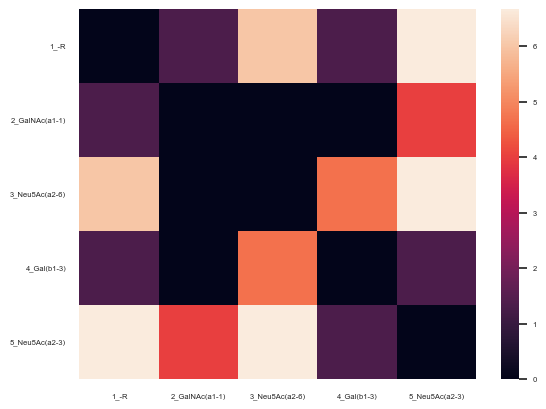

In [12]:
draw_contact_map(isvt)

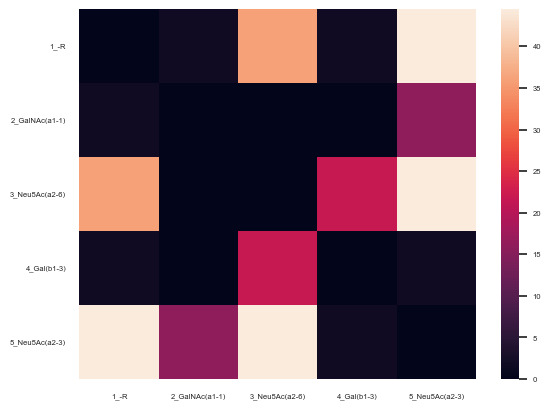

In [13]:
draw_contact_map(isvt_amplified)

In [ ]:
#draw_contact_map(atom_isvt,size =0.2)

In [ ]:
#draw_contact_map(atom_isvt_amplified,size =0.2)

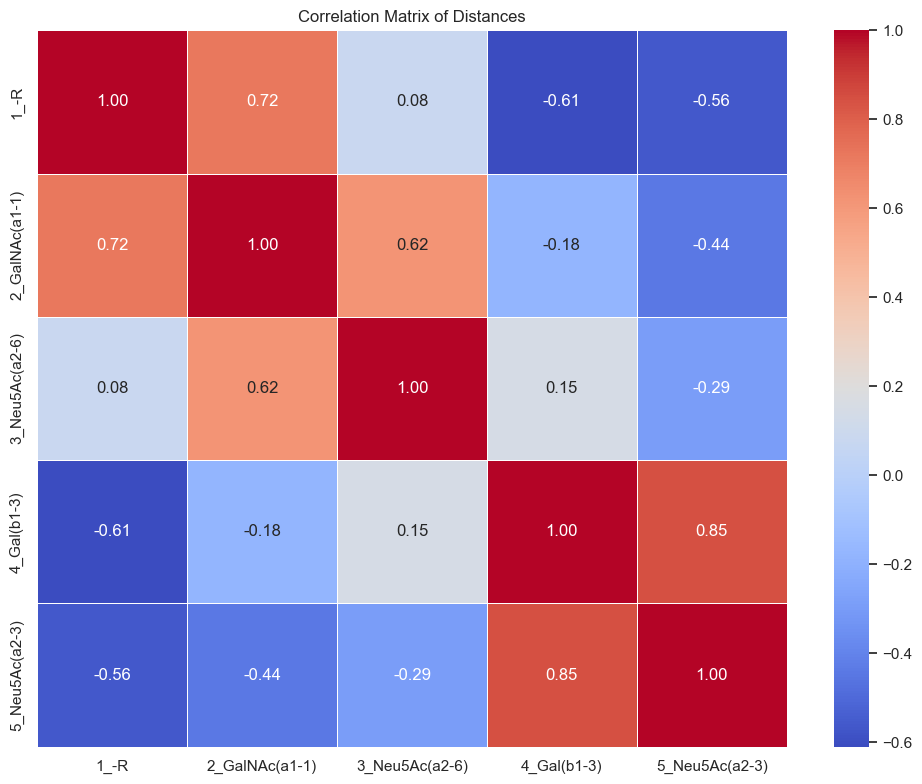

In [14]:
mx = make_correlation_matrix(g, "alpha")
show_correlations(mx)

icoord[[5.0, 5.0, 15.0, 15.0], [35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [10.0, 10.0, 32.5, 32.5]]
dcoord[[0.0, 0.5611377019219845, 0.5611377019219845, 0.0], [0.0, 0.8006487535158385, 0.8006487535158385, 0.0], [0.0, 1.380096105804567, 1.380096105804567, 0.8006487535158385], [0.5611377019219845, 3.8409173632341713, 3.8409173632341713, 1.380096105804567]]
ivl['4_Gal(b1-3)', '5_Neu5Ac(a2-3)', '3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(a1-1)']
leaves[3, 4, 2, 0, 1]
color_list['C1', 'C2', 'C2', 'C0']
leaves_color_list['C1', 'C1', 'C2', 'C2', 'C2']


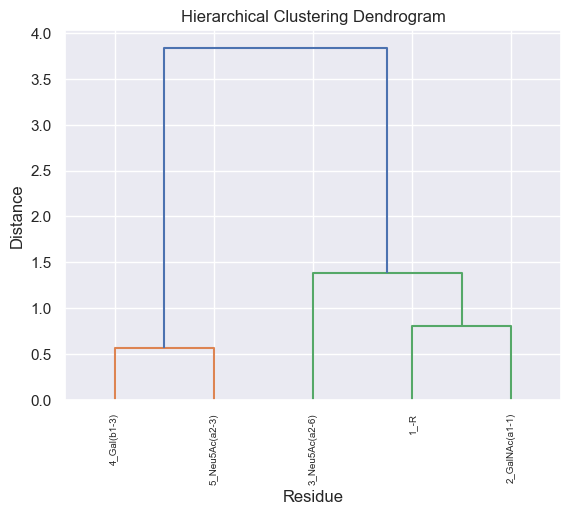

{'C1': ['4_Gal(b1-3)', '5_Neu5Ac(a2-3)'],
 'C2': ['3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(a1-1)']}

In [73]:
show_correlation_dendrogram(mx, font_size = 7)

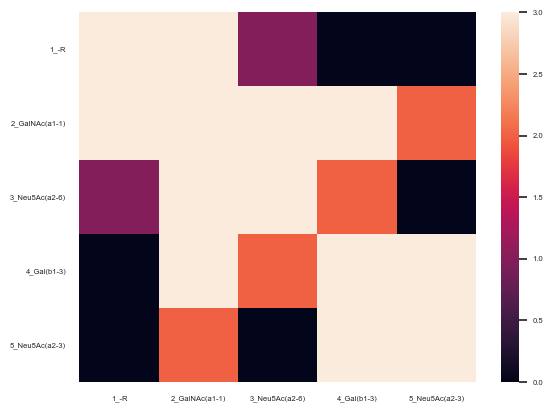

In [18]:
isft = inter_structure_frequency_table(g, "alpha")
draw_contact_map(isft)

In [19]:
#beta

# read all structures and get contact maps
dfs, int_tabs = annotation_pipeline(g, stereo="beta", threshold=3.5)
atom_dfs = [make_atom_contact_table(df,mode='inclusive', threshold = 200) for df in dfs]
dfs = [make_monosaccharide_contact_table(df,mode='distance', threshold = 200) for df in dfs]

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table(g, "beta", mode='amplify')
isvt = inter_structure_variability_table(g, "beta")

#atom_isvt_amplified = inter_structure_variability_table(atom_dfs, 'amplify')
#atom_isvt = inter_structure_variability_table(atom_dfs)

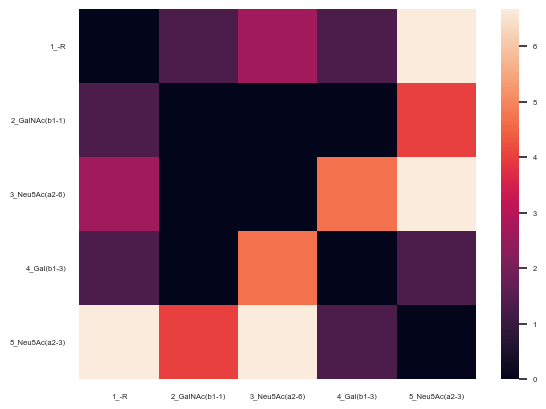

In [20]:
draw_contact_map(isvt)

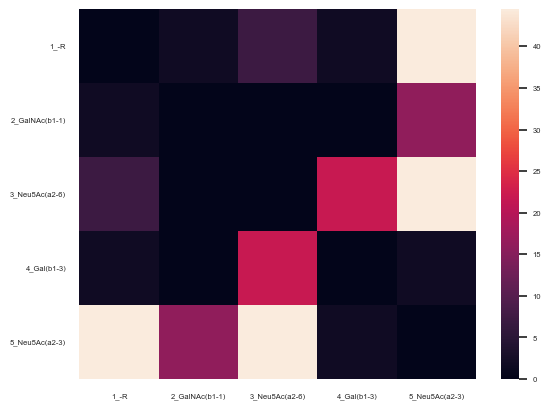

In [21]:
draw_contact_map(isvt_amplified)

In [ ]:
#draw_contact_map(atom_isvt,size =0.2)

In [ ]:
#draw_contact_map(atom_isvt_amplified,size =0.2)

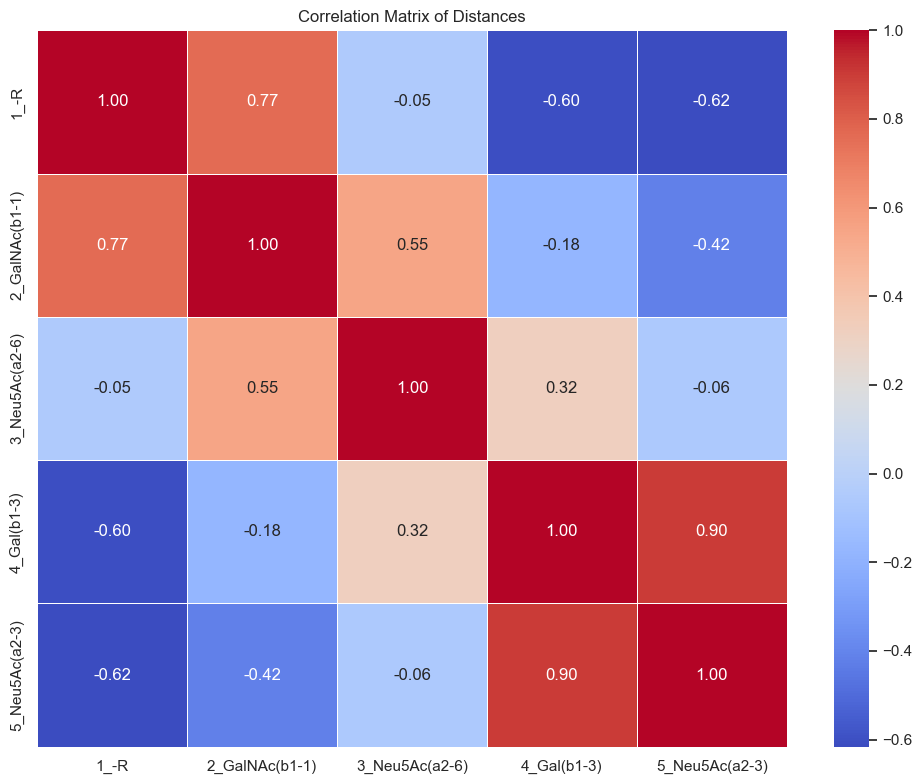

In [22]:
mx = make_correlation_matrix(g, "beta")
show_correlations(mx)

icoord[[5.0, 5.0, 15.0, 15.0], [35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [10.0, 10.0, 32.5, 32.5]]
dcoord[[0.0, 0.47487856351221003, 0.47487856351221003, 0.0], [0.0, 0.830215050781801, 0.830215050781801, 0.0], [0.0, 1.7387890085375677, 1.7387890085375677, 0.830215050781801], [0.47487856351221003, 3.6735898029431793, 3.6735898029431793, 1.7387890085375677]]
ivl['4_Gal(b1-3)', '5_Neu5Ac(a2-3)', '3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']
leaves[3, 4, 2, 0, 1]
color_list['C1', 'C2', 'C2', 'C0']
leaves_color_list['C1', 'C1', 'C2', 'C2', 'C2']
{'C1': ['4_Gal(b1-3)', '5_Neu5Ac(a2-3)'], 'C2': ['3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']}


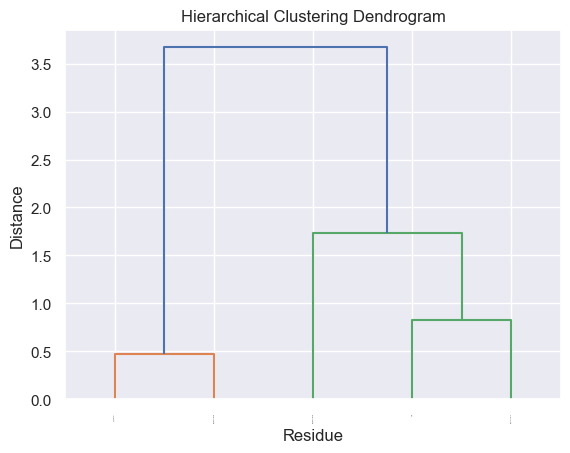

{'C1': ['4_Gal(b1-3)', '5_Neu5Ac(a2-3)'],
 'C2': ['3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']}

In [83]:
show_correlation_dendrogram(mx)

icoord[[5.0, 5.0, 15.0, 15.0], [35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [10.0, 10.0, 32.5, 32.5]]
dcoord[[0.0, 0.47487856351221003, 0.47487856351221003, 0.0], [0.0, 0.830215050781801, 0.830215050781801, 0.0], [0.0, 1.7387890085375677, 1.7387890085375677, 0.830215050781801], [0.47487856351221003, 3.6735898029431793, 3.6735898029431793, 1.7387890085375677]]
ivl['4_Gal(b1-3)', '5_Neu5Ac(a2-3)', '3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']
leaves[3, 4, 2, 0, 1]
color_list['C1', 'C2', 'C2', 'C0']
leaves_color_list['C1', 'C1', 'C2', 'C2', 'C2']
{'C1': ['4_Gal(b1-3)', '5_Neu5Ac(a2-3)'], 'C2': ['3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']}


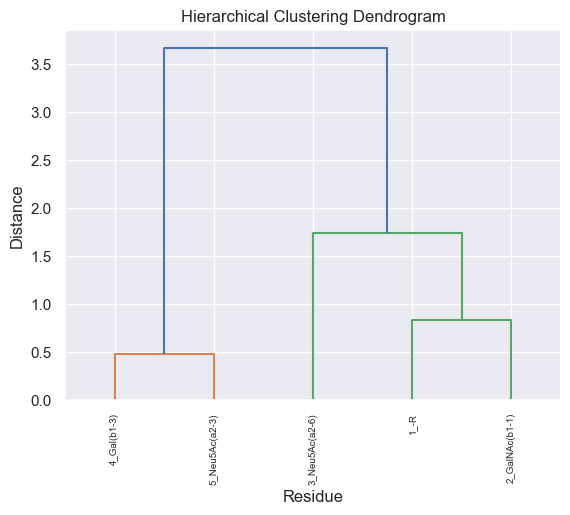

{'C1': ['4_Gal(b1-3)', '5_Neu5Ac(a2-3)'],
 'C2': ['3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']}

In [84]:
show_correlation_dendrogram(mx, font_size = 7)

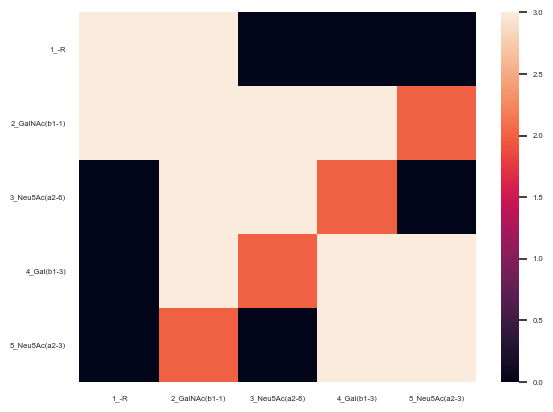

In [23]:
isft = inter_structure_frequency_table(g, "beta")
draw_contact_map(isft)

## Pipeline idea: Analysis of a set of glycans from the same topological group --> make a dendrogram and extract clusters from these glycans
## --> save a dict named according to the glyco-silhouette and containing the different clusters as well as their content

# Try a pipeline using a2-3 and a2-6 Neu5Ac()

In [31]:
success_list = success_df['glycan'].to_list()
to_process_list = []
for g in success_list :
    if 'a2-3' in g and 'a2-6' in g : 
        to_process_list.append(g)

print(to_process_list)

['Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)Gal(b1-4)Glc', 'Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)Gal(b1-4)Glc', 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-8)Neu5Ac(a2-8)Neu5Ac(a2-3)[Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)]Gal(b1-4)Glc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)Gal(b1-4)Glc', 'Neu5Ac(a2-8)Neu5Ac(a2-3)[Neu5Ac(a2-8)Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)]Gal(b1-4)Glc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Neu5Ac(a2-8)Neu5Ac(a2-3)[Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)]Gal(b1-4)Glc']


In [32]:
#manual to_process_list
to_process_list = ['Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc']

In [71]:
g = to_process_list[10]
#g = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'

# read all structures and get contact maps
dfs, int_tabs = annotation_pipeline(g, stereo="alpha", threshold=3.5)
dfs = [make_monosaccharide_contact_table(df,mode='distance', threshold = 200) for df in dfs if len(df) > 0]


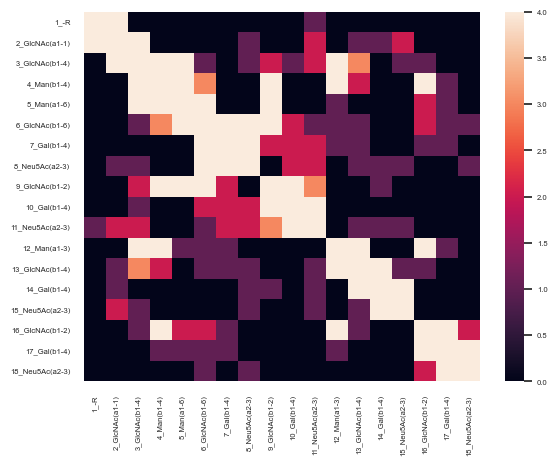

In [75]:
isft = inter_structure_frequency_table(dfs, "alpha", threshold = 7)
draw_contact_map(isft)

In [76]:
isft

,1_-R,2_GlcNAc(a1-1),3_GlcNAc(b1-4),4_Man(b1-4),5_Man(a1-6),6_GlcNAc(b1-6),7_Gal(b1-4),8_Neu5Ac(a2-3),9_GlcNAc(b1-2),10_Gal(b1-4),11_Neu5Ac(a2-3),12_Man(a1-3),13_GlcNAc(b1-4),14_Gal(b1-4),15_Neu5Ac(a2-3),16_GlcNAc(b1-2),17_Gal(b1-4),18_Neu5Ac(a2-3)
1_-R,4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2_GlcNAc(a1-1),4,4,4,0,0,0,0,1,0,0,2,0,1,1,2,0,0,0
3_GlcNAc(b1-4),0,4,4,4,4,1,0,1,2,1,2,4,3,0,1,1,0,0
4_Man(b1-4),0,0,4,4,4,3,0,0,4,0,0,4,2,0,0,4,1,0
5_Man(a1-6),0,0,4,4,4,4,0,0,4,0,0,1,0,0,0,2,1,0
6_GlcNAc(b1-6),0,0,1,3,4,4,4,4,4,2,1,1,1,0,0,2,1,1
7_Gal(b1-4),0,0,0,0,0,4,4,4,2,2,2,1,1,0,0,1,1,0
8_Neu5Ac(a2-3),0,1,1,0,0,4,4,4,0,2,2,0,1,1,1,0,0,1
9_GlcNAc(b1-2),0,0,2,4,4,4,2,0,4,4,3,0,0,1,0,0,0,0
10_Gal(b1-4),0,0,1,0,0,2,2,2,4,4,4,0,0,0,0,0,0,0


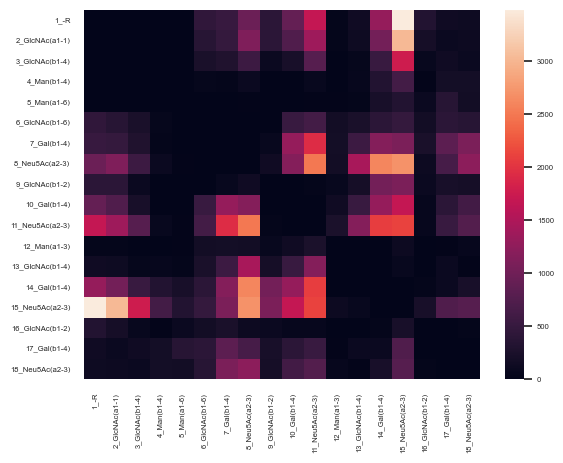

In [77]:
isvt = inter_structure_variability_table(dfs, "alpha", mode = 'amplify')
draw_contact_map(isvt)

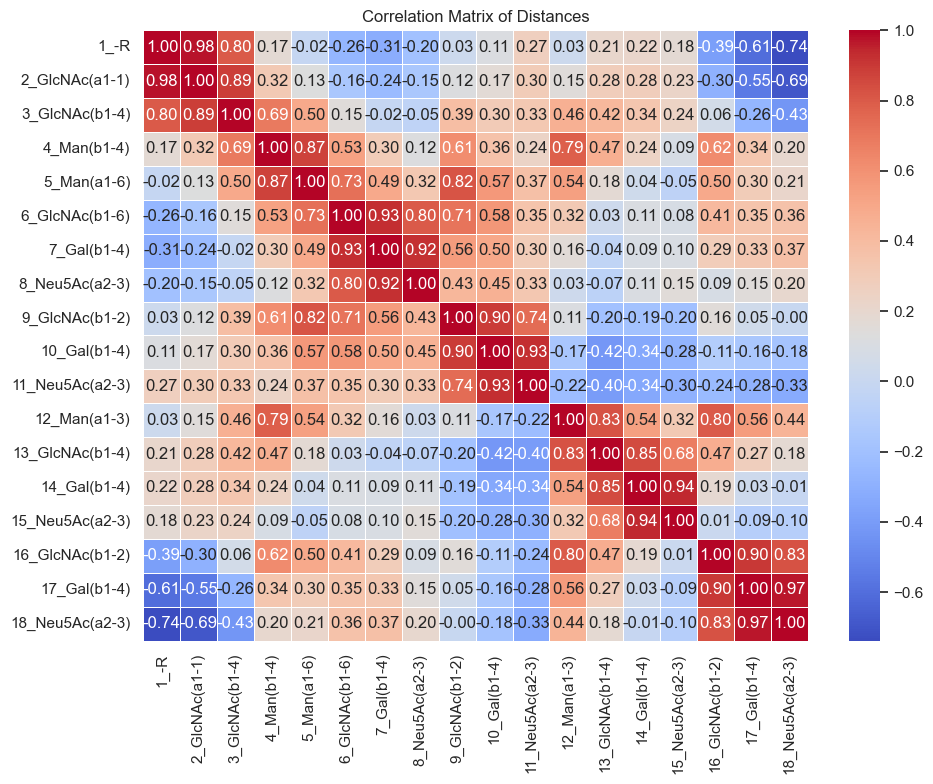

In [79]:
mx = make_correlation_matrix(dfs)
show_correlations(mx)

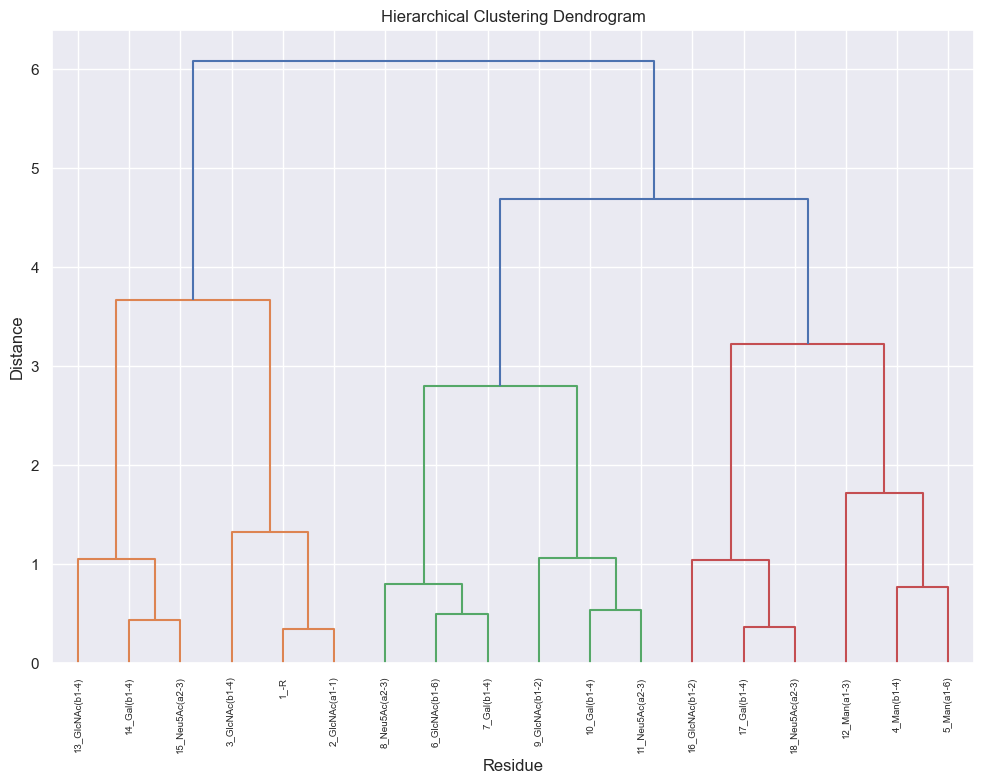

{'C1': ['13_GlcNAc(b1-4)',
  '14_Gal(b1-4)',
  '15_Neu5Ac(a2-3)',
  '3_GlcNAc(b1-4)',
  '1_-R',
  '2_GlcNAc(a1-1)'],
 'C2': ['8_Neu5Ac(a2-3)',
  '6_GlcNAc(b1-6)',
  '7_Gal(b1-4)',
  '9_GlcNAc(b1-2)',
  '10_Gal(b1-4)',
  '11_Neu5Ac(a2-3)'],
 'C3': ['16_GlcNAc(b1-2)',
  '17_Gal(b1-4)',
  '18_Neu5Ac(a2-3)',
  '12_Man(a1-3)',
  '4_Man(b1-4)',
  '5_Man(a1-6)']}

In [80]:
show_correlation_dendrogram(mx, font_size = 7)

In [81]:
residue_overall_stability = {}
for c in isvt.columns.to_list():
    residue_overall_stability[c] = sum(isvt[c].to_list())

sorted_residue_overall_stability = sorted(residue_overall_stability.items(), key=lambda x:x[1])
print(sorted_residue_overall_stability)

[('12_Man(a1-3)', 1309.0), ('5_Man(a1-6)', 1311.5), ('4_Man(b1-4)', 1681.5), ('16_GlcNAc(b1-2)', 1776.75), ('9_GlcNAc(b1-2)', 4082.25), ('6_GlcNAc(b1-6)', 4473.75), ('13_GlcNAc(b1-4)', 4742.25), ('3_GlcNAc(b1-4)', 4887.75), ('17_Gal(b1-4)', 4936.75), ('18_Neu5Ac(a2-3)', 6054.75), ('2_GlcNAc(a1-1)', 9109.75), ('10_Gal(b1-4)', 9576.75), ('7_Gal(b1-4)', 9782.0), ('1_-R', 10469.0), ('14_Gal(b1-4)', 12317.5), ('8_Neu5Ac(a2-3)', 15478.75), ('11_Neu5Ac(a2-3)', 15986.75), ('15_Neu5Ac(a2-3)', 20304.75)]


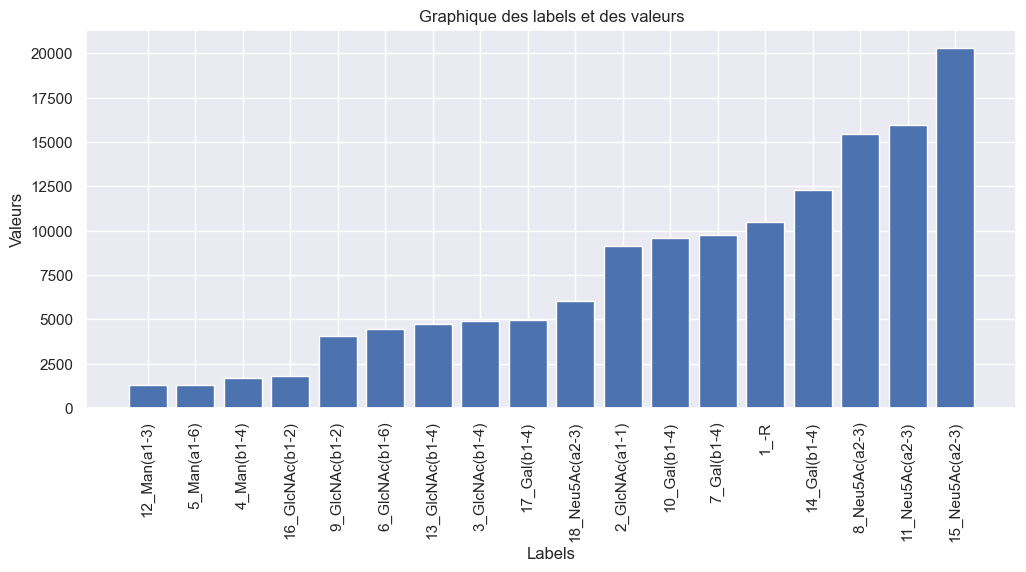

In [82]:
### BETA
labels, values = zip(*sorted_residue_overall_stability)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
#fig.savefig(g+'monosaccharide_instabilities.png')

# Save the plot as PDF
#fig.savefig(g+'monosaccharide_instabilities.pdf')

plt.show()

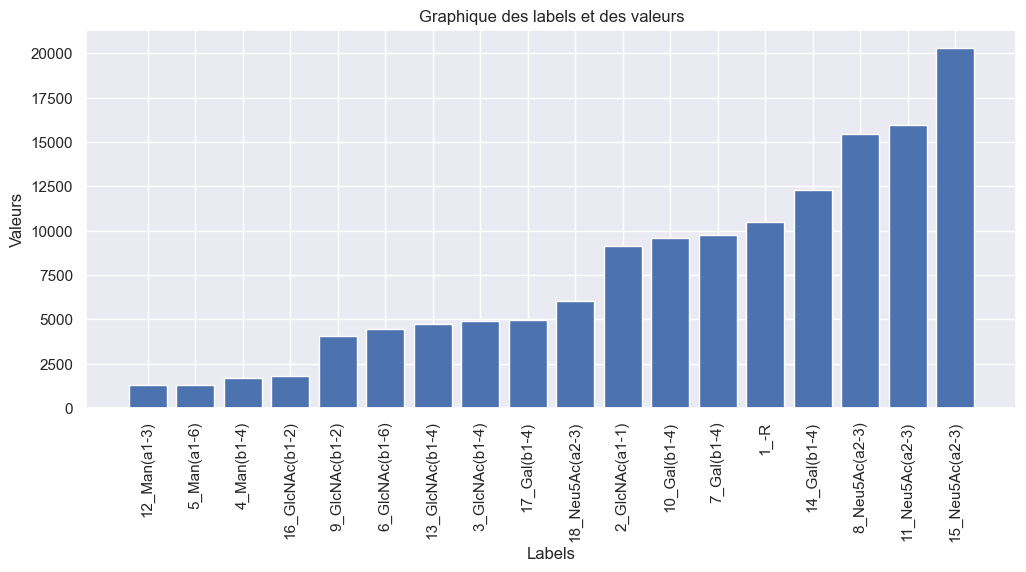

In [83]:
### ALPHA
labels, values = zip(*sorted_residue_overall_stability)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
#fig.savefig(g+'alpha_monosaccharide_instabilities.png')

# Save the plot as PDF
#fig.savefig(g+'alpha_monosaccharide_instabilities.pdf')

plt.show()

In [3]:
glycan = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
res = get_sasa_table(glycan)
res

,Monosaccharide_id,Monosaccharide,Mean Score,Median Score,Weighted Score,Standard Deviation,Coefficient of Variation
0,1,-R,0.410142,0.405758,0.416007,0.010020,0.024431
1,2,GlcNAc(a1-1),2.452159,2.649381,2.792950,0.536785,0.218903
2,3,GlcNAc(b1-4),1.926632,1.986012,2.284654,0.474065,0.246059
3,4,Man(b1-4),0.869504,0.854764,0.897422,0.053907,0.061997
4,5,Man(a1-6),1.129418,1.227519,1.210701,0.218040,0.193056
5,6,GlcNAc(b1-6),1.724005,1.563247,1.729296,0.456892,0.265018
6,7,Gal(b1-4),1.251053,1.160906,1.344917,0.242864,0.194128
7,8,Neu5Ac(a2-3),3.247980,3.124284,3.180557,0.595990,0.183496
8,9,GlcNAc(b1-2),1.783540,1.879989,1.896549,0.241319,0.135304
9,10,Gal(b1-4),1.364960,1.366820,1.618439,0.336508,0.246533


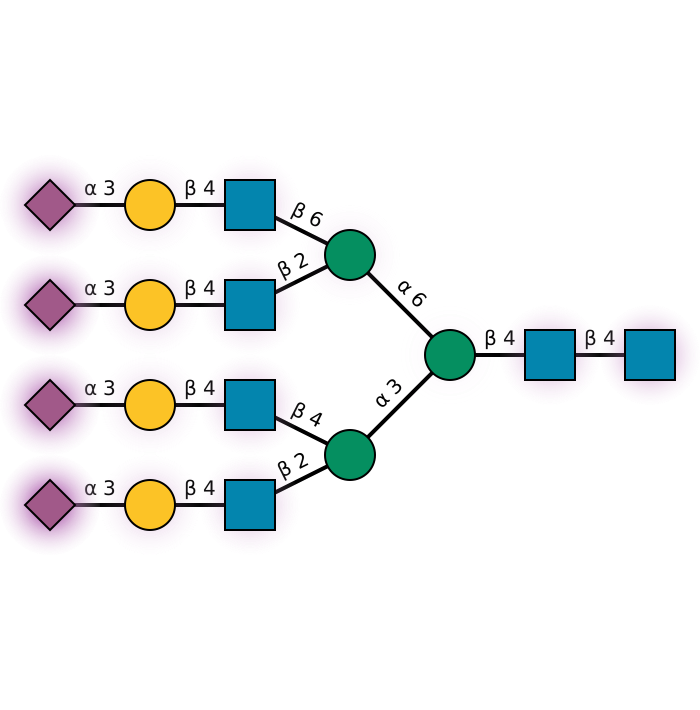

In [37]:
plot_glycan_score(glycan, attribute="Weighted Score")

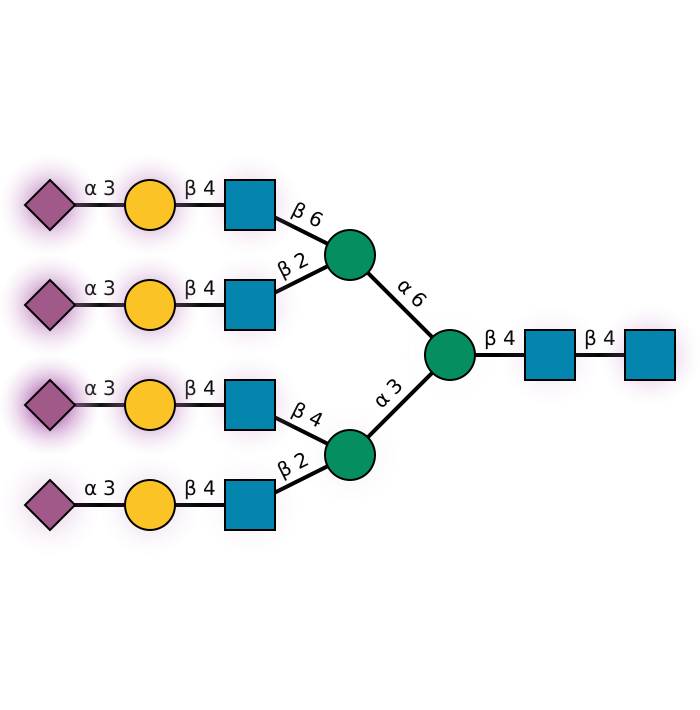

In [38]:
plot_glycan_score(glycan, attribute="weighted_mean_flexibility")

# Get cluster frequencies + Analysis

In [41]:

glycan_cluster_pattern()

Number of glycans with one major cluster: 26
Number of glycans without a major cluster: 602


(['Man3Me(a1-3)[Man3Me(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'IdoA2S(a1-4)GlcNS6S',
  'Fuc(a1-3)[Fuc(a1-2)Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Glc',
  'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)][Fuc(a1-3)]GlcNAc',
  'Gal(b1-4)Glc',
  'GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'Fuc',
  'Fuc(a1-3)[Fuc(a1-3)[Fuc(a1-2)Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)]GlcNAc(b1-4)Glc',
  'Rha(a1-2)Gal(a1-3)GlcNAc(a1-3)Rha(a1-3)Rha(a1-2)Gal(a1-3)GlcNAc(a1-3)Rha(a1-3)Rha(a1-2)Gal(a1-3)GlcNAc(a1-3)Rha',
  'Man',
  'GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc',
  'Man(a1-3)[Xyl(b1-2)][Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
  'GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA',
  'GalNAc(b1-3)GlcNAc(b1-4)Man',
  'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)M

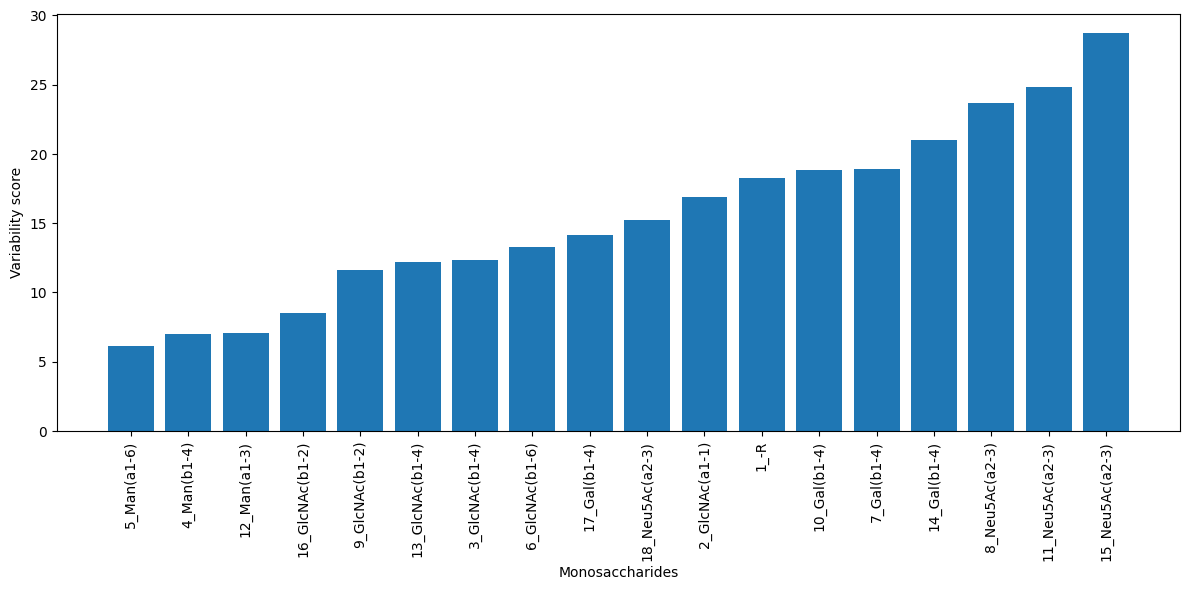

In [44]:
plot_monosaccharide_instability(glycan, mode='mean')